# Criteo Sponsored Search Conversion Log Dataset Analysis

## Resources
Dataset: [Criteo Sponsored Search Conversion Log Dataset](https://ailab.criteo.com/criteo-sponsored-search-conversion-log-dataset/)

Paper: [Reacting to Variations in Product Demand: An Application for
Conversion Rate (CR) Prediction in Sponsored Search
](https://arxiv.org/pdf/1806.08211.pdf)

## Shortform Overview of the data
- Entire dataset spans 90 days of logs
- Attribution Window used is 30 days
- Each row in the dataset represents an action (i.e. click) performed by the user on a product related advertisement.
- Each row may or may not have a conversion with it. If Sale = 1, then there was a conversion.
- The data has been sub-sampled, and it's not clear how the sampling was done. So, it could be that we have impartial user stories. For instance, multiple impressions might have _actually_ led to a conversion, but that conversion might be missing from the dataset. Similarly, multiple impressions might have _actually_ been recorded, but some impressions might be missing from the dataset. This has implications for accurately recording privacy budget deductions.

## Overview of the data
(Copied from the data source website. Emphasis is mine)

This dataset contains logs obtained from Criteo Predictive Search (CPS). CPS, offers an automated end-to-end solution using sophisticated machine learning techniques to improve Google Shopping experience using robust, predictive optimization across every aspect of the advertiser’s campaign. CPS in general has two main aims : (1) Retarget high-value users via behavioral targeting such that the bids are based on each user’s likelihood to make a purchase. (2) Increase ROI using a bidding strategy which incorporates the effects of product characteristics, user intent, device and user behavior.

**Each row in the dataset represents an action (i.e. click) performed by the user on a product related advertisement**. The product advertisement was shown to the user, post the user expressing an intent via an online search engine.  Each row in the dataset, contains information about the product characteristics (age, brand, gender, price), time of the click ( subject to uniform shift), user characteristics and device information. The **logs also contain information on whether the clicks eventually led to a conversion (product was bought) within a 30 day window and the time between click and the conversion**.

**This dataset represents a sample of 90 days of Criteo live traffic data**. Each line corresponds to one click (product related advertisement) that was displayed to a user. For each advertisement, we have detailed information about the product. Further, we also provide information on whether the click led to a conversion, amount of conversion and the time between the click and the conversion. **Data has been sub-sampled** and anonymized so as not to disclose proprietary elements.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

### Dataset Retrieval
This notebook assumes you already have the dataset downloaded and in the current directory. If you do not, uncomment and run the following cell. Note that the uncompressed data is ~6 GB.

In [2]:
# !wget http://go.criteo.net/criteo-research-search-conversion.tar.gz
# !tar -xzf criteo-research-search-conversion.tar.gz

--2024-03-05 16:35:48--  http://go.criteo.net/criteo-research-search-conversion.tar.gz
Resolving go.criteo.net (go.criteo.net)... 74.119.119.86
Connecting to go.criteo.net (go.criteo.net)|74.119.119.86|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://criteostorage.blob.core.windows.net/criteo-research-datasets/Criteo_Conversion_Search.tar.gz [following]
--2024-03-05 16:35:48--  https://criteostorage.blob.core.windows.net/criteo-research-datasets/Criteo_Conversion_Search.tar.gz
Resolving criteostorage.blob.core.windows.net (criteostorage.blob.core.windows.net)... 20.209.1.1
Connecting to criteostorage.blob.core.windows.net (criteostorage.blob.core.windows.net)|20.209.1.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2002864638 (1.9G) [application/x-gzip]
Saving to: 'criteo-research-search-conversion.tar.gz'

     0K .......... .......... .......... .......... ..........  0% 1.83M 17m26s
    50K .......... .......... ......

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
DATA_FILE = 'Criteo_Conversion_Search/CriteoSearchData'
dtype={
    "Sale": np.int32,
    "SalesAmountInEuro": np.float64,
    "Time_delay_for_conversion": np.int32,
    "click_timestamp": np.int32,
    "nb_clicks_1week": pd.Int64Dtype(),
    "product_price": np.float64,
    "product_age_group": str,
    "device_type": str,
    "audience_id": str,
    "product_gender": str,
    "product_brand": str,
    "product_category1": str,
    "product_category2": str,
    "product_category3": str,
    "product_category4": str,
    "product_category5": str,
    "product_category6": str,
    "product_category7": str,
    "product_country": str,
    "product_id": str,
    "product_title": str,
    "partner_id": str,
    "user_id": str,
}
na_values={
    "click_timestamp": "0",
    "nb_clicks_1week": "-1",
    "product_price": "-1",
    "product_age_group": "-1",
    "device_type": "-1",
    "audience_id": "-1",
    "product_gender": "-1",
    "product_brand": "-1",
    "product_category1": "-1",
    "product_category2": "-1",
    "product_category3": "-1",
    "product_category4": "-1",
    "product_category5": "-1",
    "product_category6": "-1",
    "product_category7": "-1",
    "product_country": "-1",
    "product_id": "-1",
    "product_title": "-1",
    "partner_id": "-1",
    "user_id": "-1",
}
columns_to_drop = [
    'product_category1', 'product_category2', 'product_category3', 'product_category4',
    'product_category5', 'product_category6', 'product_category7',
    'product_title', 'product_brand', 'product_gender', 'audience_id', 'product_age_group'
]

In [3]:
df = pd.read_csv(DATA_FILE, names=dtype.keys(), dtype=dtype, na_values=na_values, header=None, sep="\t")
df = df.drop(columns=columns_to_drop)
df.head()

,Sale,SalesAmountInEuro,Time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,device_type,product_country,product_id,partner_id,user_id
0,0,-1.0,-1,1598891820,<NA>,0.0,7E56C27BFF0305E788DA55A029EC4988,57A1D462A03BD076E029CF9310C11FC5,A66DB02AC1726A8D79C518B7F7AB79F0,E3DDEB04F8AFF944B11943BB57D2F620,493CFB4A87C50804C94C0CF76ABD19CD
1,0,-1.0,-1,1598925284,0,0.0,D7D1FB49049702BF6338894757E0D959,57A1D462A03BD076E029CF9310C11FC5,4C6C62203B4CE5AA6DFCF17F2604DC37,BD01BAFAE73CF38C403978BBB458300C,D0EBCD4402172AE3AA6FD21FB77BDE84
2,0,-1.0,-1,1598892568,<NA>,0.0,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,C4D189327BD87FEB3BF896DA716C6995,E8A8BEA257B19574C36108D0F0CDADE5
3,0,-1.0,-1,1598891174,<NA>,0.0,D7D1FB49049702BF6338894757E0D959,NaN,NaN,440255DF62CFD36FBC0206828FC488E0,9703077BD18F430BD232A6F74931928E
4,0,-1.0,-1,1598905245,<NA>,0.0,7E56C27BFF0305E788DA55A029EC4988,57A1D462A03BD076E029CF9310C11FC5,5F4AFF2693601C2EFFE9AF2C1ED4222E,E3DDEB04F8AFF944B11943BB57D2F620,703B8CFC8D65A67BDF96595CCF992D27


In [8]:
# create some other columns from existing data for easier reading
df['click_datetime'] = df['click_timestamp'].apply(lambda x: datetime.fromtimestamp(x))
df['click_week'] = df['click_datetime'].apply(lambda x: x.isocalendar().week)
df['click_day'] = df['click_datetime'].apply(lambda x: (7 * (x.isocalendar().week - 1)) + x.isocalendar().weekday)

seconds_in_day = 86400
df['day_delay_for_conversion'] = df['Time_delay_for_conversion'].apply(lambda x: x / seconds_in_day)
# Sale: Indicates 1 if conversion occurred and 0 if not)
# some product ids and time delays are missing from conversions
total_impressions = df.shape[0]
converted_products = pd.DataFrame(df.loc[(df.Sale == 1) & (df.product_id.notna()) & (df.Time_delay_for_conversion != -1)])

In [29]:
converted_products.head()

,Sale,SalesAmountInEuro,Time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,device_type,product_country,product_id,partner_id,user_id,click_datetime,click_week,click_day,day_delay_for_conversion,conversion_timestamp
5,1,89.90,442485,1598929598,9,49.95,D7D1FB49049702BF6338894757E0D959,D963E3BCE149E71F5D5E3000DCF68A9F,C806140F3AF11759BEF4E3B79B51588F,743B1EE3A39E06D855A72B3B66D501D0,E94BA61ACE2488B7DA7920736B82DFBD,2020-08-31 23:06:38,36,246,5.121354,1599372083
7,1,158.33,184,1598908235,<NA>,158.33,D7D1FB49049702BF6338894757E0D959,57A1D462A03BD076E029CF9310C11FC5,9E12223B51B3D14342F2DBD05EA8B302,E3DDEB04F8AFF944B11943BB57D2F620,A00E7A8538C058366DA15181CC56FD99,2020-08-31 17:10:35,36,246,0.002130,1598908419
14,1,38.40,60529,1598914046,<NA>,10.74,D7D1FB49049702BF6338894757E0D959,57A1D462A03BD076E029CF9310C11FC5,5CA21A95401BDEEB84C86C0470ADB770,E3DDEB04F8AFF944B11943BB57D2F620,2324579BDAC61ED6E3BBBB799516AA6A,2020-08-31 18:47:26,36,246,0.700567,1598974575
30,1,26.38,557307,1598859587,<NA>,13.19,7E56C27BFF0305E788DA55A029EC4988,57A1D462A03BD076E029CF9310C11FC5,D362EA2039B5429CC545CB390E278270,E3DDEB04F8AFF944B11943BB57D2F620,1967F0A0EF8409D375C095E63B2AF8A4,2020-08-31 03:39:47,36,246,6.450312,1599416894
37,1,46.27,3538,1598911380,<NA>,39.43,D7D1FB49049702BF6338894757E0D959,57A1D462A03BD076E029CF9310C11FC5,E09935C131B17B9A7324CC7116183F63,E3DDEB04F8AFF944B11943BB57D2F620,1456A8090909E75AD8E170CE27520A47,2020-08-31 18:03:00,36,246,0.040949,1598914918


In [30]:
total_conversions = converted_products.shape[0]
unique_user_count = len(converted_products.groupby(['user_id'])['user_id'].count())

print("total impressions:", total_impressions, "total conversions:", total_conversions)
print("conversion rate:", total_conversions/total_impressions*100, "%")
print("unique users:", unique_user_count)


total impressions: 15995634 total conversions: 1275735
conversion rate: 7.975520070039112 %
unique users: 1189411


### What user stories does this dataset give us?

For a given user's search for a partner's product, we can construct timelines where a user encountered several impressions within a given attribution window that either did not lead to a conversion or did. However, the data has been sub-sampled, and it's not clear how the sampling was done. So, **we must assume that we have impartial user stories**.

For instance, multiple impressions might have _actually_ led to a conversion, but that conversion might be missing from the dataset. Similarly, multiple impressions might have _actually_ been recorded, but some impressions might be missing from the dataset.

This divergence between reality and the dataset has implications for accurately recording privacy budget deductions.

In [13]:
# get counts of impressions grouped by user_id, product_id, and partner_id
user_product_counts = df.groupby(['user_id', 'product_id', 'partner_id']).count()

#### Analyzing an example of multiple impressions leading to a conversion

In [19]:
# look at instances where multiple impressions led to a sale. Note, if a product converted multiple times, all impressions
# across all times will be reflected in this output. That's okay, we're just trying to get a general sense of one user to
# illustrate our example.
(user_product_counts
    .loc[user_product_counts.Sale > 1]
    .merge(converted_products, on=['user_id', 'product_id', 'partner_id'], how="inner")
     .sort_values(by=['Sale_x'], ascending=False))

,user_id,product_id,partner_id,Sale_x,SalesAmountInEuro_x,Time_delay_for_conversion_x,click_timestamp_x,nb_clicks_1week_x,product_price_x,device_type_x,...,Time_delay_for_conversion_y,click_timestamp_y,nb_clicks_1week_y,product_price_y,device_type_y,product_country_y,click_datetime_y,click_week_y,click_day_y,day_delay_for_conversion_y
70097,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050,18,18,18,18,18,18,18,...,87431,1604264919,16,129.98,D7D1FB49049702BF6338894757E0D959,D963E3BCE149E71F5D5E3000DCF68A9F,2020-11-01 16:08:39,44,308,1.011933
70098,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050,18,18,18,18,18,18,18,...,269,1598671062,117,99.98,D7D1FB49049702BF6338894757E0D959,D963E3BCE149E71F5D5E3000DCF68A9F,2020-08-28 23:17:42,35,243,0.003113
70096,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050,18,18,18,18,18,18,18,...,261835,1602771242,56,149.25,D7D1FB49049702BF6338894757E0D959,D963E3BCE149E71F5D5E3000DCF68A9F,2020-10-15 10:14:02,42,291,3.030498
20822,49AEC90CD80DF036240E79AC6272789B,64F6D2E90050DEBA6B0FCC4CE00370F4,6BFFDE668C5BC3938C875D3D0940E699,16,16,16,16,16,16,16,...,2242,1600449106,756,59.34,7E56C27BFF0305E788DA55A029EC4988,989EEF92F2A525DD896557425EA7C4C7,2020-09-18 13:11:46,38,264,0.025949
20823,49AEC90CD80DF036240E79AC6272789B,64F6D2E90050DEBA6B0FCC4CE00370F4,6BFFDE668C5BC3938C875D3D0940E699,16,16,16,16,16,16,16,...,62881,1600064738,1062,59.34,7E56C27BFF0305E788DA55A029EC4988,989EEF92F2A525DD896557425EA7C4C7,2020-09-14 02:25:38,38,260,0.727789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25428,5AFEF0D8FDBCFC0FCB8D37E1DAE64BB3,BCE23E1787244F4F67B5571A988313E7,4D4806B2F138ED89BEB51D3010AF2033,2,2,2,2,2,2,2,...,1124,1600551290,23,25.90,7E56C27BFF0305E788DA55A029EC4988,989EEF92F2A525DD896557425EA7C4C7,2020-09-19 17:34:50,38,265,0.013009
25429,5AFFDBD4AF16D8A16CDD46CD1E5742BC,68C92736A2EE9F3DB958C17E9B3EC72A,E3DDEB04F8AFF944B11943BB57D2F620,2,2,2,2,2,2,2,...,84105,1602640715,36,13.33,FF2C446555E3822B0E0FC3406116E86D,57A1D462A03BD076E029CF9310C11FC5,2020-10-13 21:58:35,42,289,0.973437
25430,5B01352254163ADA844EBE2CC89A115F,789471827B7EE4F86E7ABD1800DB6CA9,E3DDEB04F8AFF944B11943BB57D2F620,2,2,2,2,2,2,2,...,1147,1603471008,21,85.63,D7D1FB49049702BF6338894757E0D959,57A1D462A03BD076E029CF9310C11FC5,2020-10-23 12:36:48,43,299,0.013275
25431,5B01853E2CF6B5A7E2C6A7F7CB223957,1F310A684A98D4EE918C99786B75F322,868F524A0D97EE7404DFFB3ABA8517CE,2,2,2,2,2,2,2,...,3980,1598413022,0,52.50,7E56C27BFF0305E788DA55A029EC4988,B74153C05E08C5657699F356BFDB2D85,2020-08-25 23:37:02,35,240,0.046065


We have **72,059** conversions that were the result of multiple impressions according to the dataset given.

In [23]:
# Let's look at this user's journey over the 90 day period with this product
(df
 .loc[(df.user_id == 'F9568D9DCAE87D4DA1619BC5D367531A') & (df.product_id == '4DD2BFEC229A88968B59AECD828A724F')]
 .sort_values(by=['click_timestamp'])[['Sale', 'SalesAmountInEuro', 'click_datetime', 'user_id', 'product_id', 'partner_id']])

,Sale,SalesAmountInEuro,click_datetime,user_id,product_id,partner_id
2223818,0,-1.00,2020-08-24 15:11:36,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
11966407,1,99.98,2020-08-28 23:17:42,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
13637556,0,-1.00,2020-09-03 10:31:44,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
10937517,0,-1.00,2020-09-09 13:20:50,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
452937,0,-1.00,2020-09-09 21:26:55,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
9471268,0,-1.00,2020-09-22 21:05:31,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
10014822,0,-1.00,2020-09-27 10:19:11,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
4716273,0,-1.00,2020-09-27 21:50:47,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
1235682,0,-1.00,2020-09-30 10:04:25,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050
10782472,0,-1.00,2020-10-06 14:56:48,F9568D9DCAE87D4DA1619BC5D367531A,4DD2BFEC229A88968B59AECD828A724F,5D4FE9350AF7E4CAE2CD24EDEC6F9050


This user bought this product 3 times within the 90 day period, and was impressed upon the product multiple times between. **However, we don't know if more impressions are missing or if more conversions are missing from the true dataset**.

# Sample queries that we can use that might be helpful
We explore a few naive queries similar to those performed in the [attribution reporting trust safety demo](https://github.com/GoogleChromeLabs/trust-safety-demo/blob/main/attribution-reporting/functions/apps/adtech.js#L164-L165).

In [9]:
sales_by_country = converted_products.groupby(['product_country'])['SalesAmountInEuro'].sum()
sales_by_country

product_country
1891ECB8C7C09755B33266AFD614660A    6.094790e+03
2AC62132FBCFA093B9426894A4BC6278    3.971119e+07
2D272B47B9F6C9A9690C783C6ACA8E8D    7.775628e+04
4A3E87E6152F02C52A014D0846726558    9.603971e+03
57A1D462A03BD076E029CF9310C11FC5    7.208596e+07
706D09EEA6B6EA9A3DD3EAE236428B6B    1.615583e+05
989EEF92F2A525DD896557425EA7C4C7    1.760631e+07
A5B2C360D0724A75CDB046D64D30ACAD    2.452849e+05
B1D897877EBD2BCE4A722DF0581CDAF5    4.013460e+06
B74153C05E08C5657699F356BFDB2D85    5.980022e+05
B8E45AC35500A8A97A62A57B9B8B3CC8    1.255653e+04
D12ABFD80E8B026DA7D56377F588093B    3.947056e+04
D8BAE0DF7EDB963C5F3A37A22311705A    5.241688e+03
D963E3BCE149E71F5D5E3000DCF68A9F    2.052826e+07
DE706337A6260D3C92FB07341E9C48A5    3.449865e+03
F0C08A161AA0404193A7EF78F5C3E06C    4.146227e+05
F47588BE654E207435633B072A9D69BC    8.943244e+05
Name: SalesAmountInEuro, dtype: float64

In [10]:
count_product_id_by_country = converted_products.groupby(['product_id', 'product_country'])['product_id'].count().sort_values(ascending=False)
count_product_id_by_country

product_id                        product_country                 
F63BFBAC4CB7EB62575754BECFD086D2  57A1D462A03BD076E029CF9310C11FC5    3163
FA96CCF63DBA1E30F345A440270358C8  989EEF92F2A525DD896557425EA7C4C7    1062
C1617B8377109BB4B37839C4553F391F  2AC62132FBCFA093B9426894A4BC6278    1057
81EBF381DF63176D7EA90F6229B64C36  57A1D462A03BD076E029CF9310C11FC5     950
B7E9462A7CEC9D1AEC7B984C260C2ADA  989EEF92F2A525DD896557425EA7C4C7     912
                                                                      ... 
75371473A789EE50BC94833D02623458  57A1D462A03BD076E029CF9310C11FC5       1
7536EA5B985A6D855A0381A4101B2ABE  57A1D462A03BD076E029CF9310C11FC5       1
7536E9A5E9300783B429DA87E32D3170  57A1D462A03BD076E029CF9310C11FC5       1
7536C3D99EC8F33FF00F5FCAC994E934  57A1D462A03BD076E029CF9310C11FC5       1
00001E027DE43944829698716EA2299C  2AC62132FBCFA093B9426894A4BC6278       1
Name: product_id, Length: 448747, dtype: int64

In [11]:
count_product_id = converted_products.groupby(['product_id'])['product_id'].count().sort_values(ascending=False)
count_product_id

product_id
F63BFBAC4CB7EB62575754BECFD086D2    3163
FA96CCF63DBA1E30F345A440270358C8    1062
C1617B8377109BB4B37839C4553F391F    1057
81EBF381DF63176D7EA90F6229B64C36     950
B7E9462A7CEC9D1AEC7B984C260C2ADA     912
                                    ... 
66E44099C72C7A713B44EEA006E69352       1
66E3EE1BE0027E07246C68B6EB634293       1
66E3A8648B383DDE4D48A51655317422       1
66E35DB903FA1D7B8331BFC322EFC1BE       1
800288F546229231D46D26FBEA6B4EB6       1
Name: product_id, Length: 439942, dtype: int64

# Simple metrics about the dataset

## Distribution of conversion delays

In [12]:
converted_day_delay = (
    converted_products
    .loc[:, 'day_delay_for_conversion']
)

ct_count = converted_day_delay.shape[0]
ct_mean = converted_day_delay.mean()
ct_min = converted_day_delay.min()
ct_max = converted_day_delay.max()
ct_median = converted_day_delay.median()

print("count of conversions with day delays:", ct_count)
print("mean of conversions with day delays:", f"{(ct_mean)} days")
print("min of conversions with day delays:", f"{(ct_min)} days")
print("max of conversions with day delays:", f"{(ct_max)} days")
print("median of conversions with day delays:", f"{(ct_median)} days")


count of conversions with day delays: 1275735
mean of conversions with day delays: 4.1740758032334 days
min of conversions with day delays: 0.0 days
max of conversions with day delays: 29.96179398148148 days
median of conversions with day delays: 0.08703703703703704 days


<Axes: xlabel='Days', ylabel='log Frequency'>

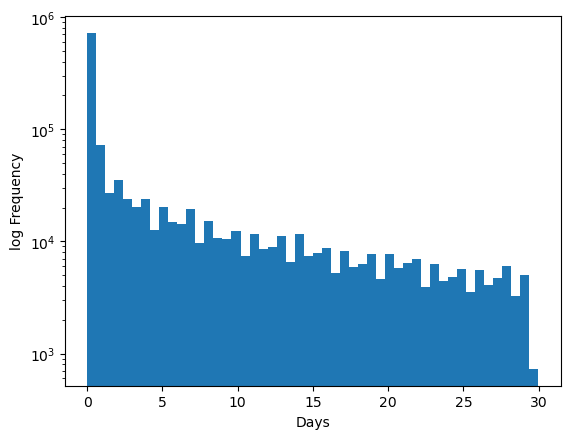

In [13]:
histogram = converted_day_delay.plot.hist(bins=50, log=True)
histogram.set_xlabel("Days")
histogram.set_ylabel("log Frequency")
histogram

## A look into the different `partner_id`s

In [14]:
print("number of partners:", len(converted_products.groupby(['partner_id'])))

number of partners: 274


count of partners: 274


Text(0, 0.5, 'Frequency')

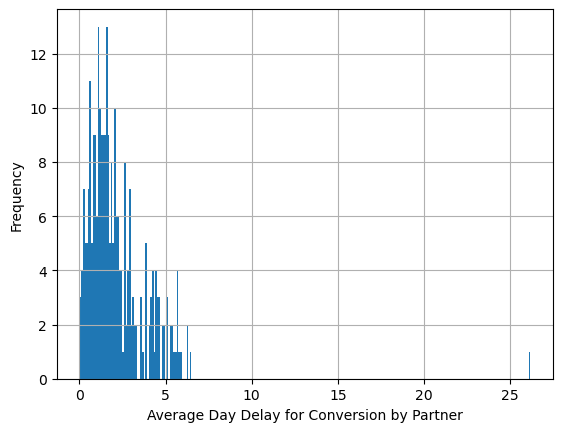

In [15]:
# it might be useful to consider the types of partners we have. perhaps certain partners sell products
# that, on average, take longer to convert than others.
average_conversion_delays_by_partner = converted_products.groupby(['partner_id'])['day_delay_for_conversion'].mean()
print("count of partners:", len(average_conversion_delays_by_partner))
partner_hist = average_conversion_delays_by_partner.hist(bins=274)
partner_hist.set_xlabel("Average Day Delay for Conversion by Partner")
partner_hist.set_ylabel("Frequency")

It looks like one partner as a relatively large, average day delay for conversion.

In [16]:
print("min average conversion delays by partner (days):", average_conversion_delays_by_partner.min())
print("median average conversion delays by partner (days):", average_conversion_delays_by_partner.median())
print("mean average conversion delays by partner (days):", average_conversion_delays_by_partner.mean())
print("max average conversion delays by partner (days):", average_conversion_delays_by_partner.max())

min average conversion delays by partner (days): 0.0053626543209876545
median average conversion delays by partner (days): 1.6800183342829604
mean average conversion delays by partner (days): 2.184866832418895
max average conversion delays by partner (days): 26.181122685185183


## A look into the different `product_id`s

In [17]:
print("number of products:", len(converted_products.groupby(['product_id'])))

number of products: 439942


439942


Text(0, 0.5, 'Frequency')

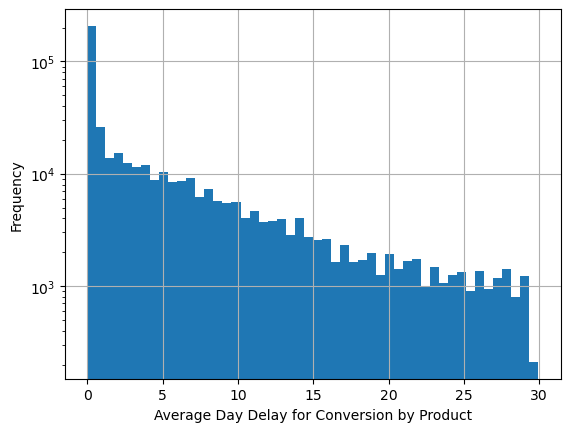

In [18]:
# or, it might be useful to consider the types of products we have. Different products convert at
# different rates.
average_conversion_delays_by_product = converted_products.groupby(['product_id'])['day_delay_for_conversion'].mean()
print(len(average_conversion_delays_by_product))
product_hist = average_conversion_delays_by_product.hist(bins=50, log=True)
product_hist.set_xlabel("Average Day Delay for Conversion by Product")
product_hist.set_ylabel("Frequency")

It looks like we have a heavily skewed distribution, where the ~51% convert in < 1 day.

In [20]:
print("min average conversion delays by product (days):", average_conversion_delays_by_product.min())
print("median average conversion delays by product (days):", average_conversion_delays_by_product.median())
print("mean average conversion delays by product (days):", average_conversion_delays_by_product.mean())
print("max average conversion delays by product (days):", average_conversion_delays_by_product.max())
percent_conversions_lt_one_day = len(average_conversion_delays_by_product[average_conversion_delays_by_product < 1]) / len(average_conversion_delays_by_product) * 100
print("conversions that occurred within a day (%):", percent_conversions_lt_one_day)

min average conversion delays by product (days): 2.3148148148148147e-05
median average conversion delays by product (days): 0.9157175925925927
mean average conversion delays by product (days): 4.243604635892748
max average conversion delays by product (days): 29.92792824074074
conversions that occurred within a day (%): 51.089234490000955


## A look into the `nb_clicks_1week` column

The dataset describes this column's significance as, the "[n]umber of clicks the product related advertisement has received in the last 1 week." The related paper describes a process where the dataset was constructed from click event data and enrichment data from the advertisers. Specifically, they state, "[c]lick events together with their attributed sales information are
enriched with product related information from advertisers’ catalogs (e.g., product price, product category) and with statistics about users / products interactions collected from advertisers’ shopping websites (e.g., the number of pages views in the last week for a particular product). Click events data is also enriched with average cost-per-click information computed from AdWords cost reports."

I'm pretty sure `nb_clicks_1week` is produced by the advertiser to give statistics about the number of clicks within the last week for a given product. In other words, I'm pretty sure it's not tied to the specific user performing the click. Assuming this is correct, this column has nothing to do with impression clicks for the given user, so we do not need to account for it in our privacy budgeting. Moreover, this does not affect the aforementioned attribution window of 30 days.

Let's see what the trends are in clicks for the most heavily clicked products.

In [21]:
nb_clicks = converted_products[['click_datetime', 'click_week', 'nb_clicks_1week', 'product_id', 'partner_id', 'user_id']]

nb_clicks.sort_values(by=['nb_clicks_1week', 'click_datetime'], ascending=False).head(50)


,click_datetime,click_week,nb_clicks_1week,product_id,partner_id,user_id
14432623,2020-08-03 18:36:41,32,23822,C62B95125E68769DFBC88374DEF86F5F,6CCBF9BF3B87306C95BD5CD15F4CD324,93500531E3F899A8D88DD6175EAFCCC5
11601619,2020-08-03 12:37:55,32,23822,C62B95125E68769DFBC88374DEF86F5F,6CCBF9BF3B87306C95BD5CD15F4CD324,34DC028A2535DDD57FC1FD0C5541FBA2
8077330,2020-08-14 01:48:33,33,21413,F26277FBA839930119647691196AC244,6CCBF9BF3B87306C95BD5CD15F4CD324,BCF504F0AC05AF9BF91D883595D1BC0F
4249320,2020-08-14 00:40:28,33,21413,F26277FBA839930119647691196AC244,6CCBF9BF3B87306C95BD5CD15F4CD324,2987835CD7A59904B33E5A86FD73A8A2
2092663,2020-08-13 15:05:55,33,21413,F26277FBA839930119647691196AC244,6CCBF9BF3B87306C95BD5CD15F4CD324,005F5779E8051C4890DB5FFC353D728D
7504142,2020-08-10 05:40:19,33,19703,C62B95125E68769DFBC88374DEF86F5F,6CCBF9BF3B87306C95BD5CD15F4CD324,B62AF73153875E35C5BF4067B007C3E3
94117,2020-08-10 05:36:47,33,19703,C62B95125E68769DFBC88374DEF86F5F,6CCBF9BF3B87306C95BD5CD15F4CD324,1D9DAD3D1930189459500FA5B5DAD62C
1131835,2020-08-10 03:32:41,33,19703,C62B95125E68769DFBC88374DEF86F5F,6CCBF9BF3B87306C95BD5CD15F4CD324,0D72E84DFC6BA7DA18453B6D5037D287
3726348,2020-08-13 17:12:31,33,19274,C62B95125E68769DFBC88374DEF86F5F,6CCBF9BF3B87306C95BD5CD15F4CD324,5B5D9AAF46F18B4D20C10F629231FFF4
1579031,2020-08-17 22:27:05,34,19154,F26277FBA839930119647691196AC244,6CCBF9BF3B87306C95BD5CD15F4CD324,DDC4A06EA7A4B774680905DA1ED3505D


Notice how the `nb_clicks_1week` are shared across `user_id` who convert on the same `product_id` from a `partner_id`.

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


C:\Users\petem\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


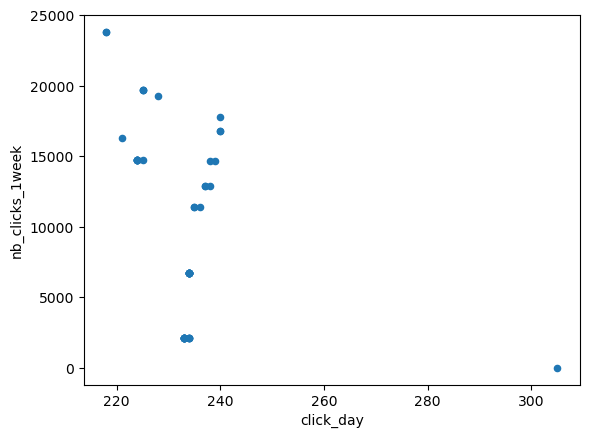

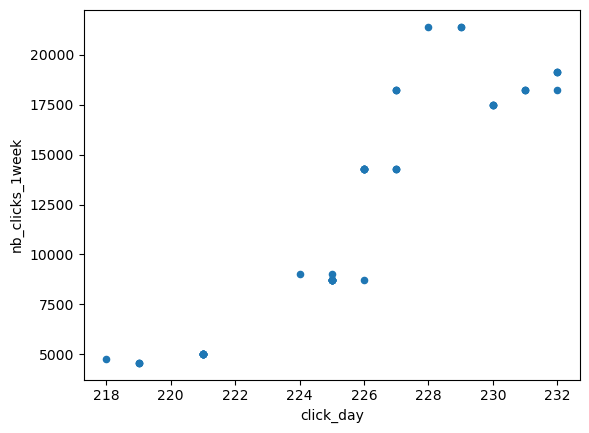

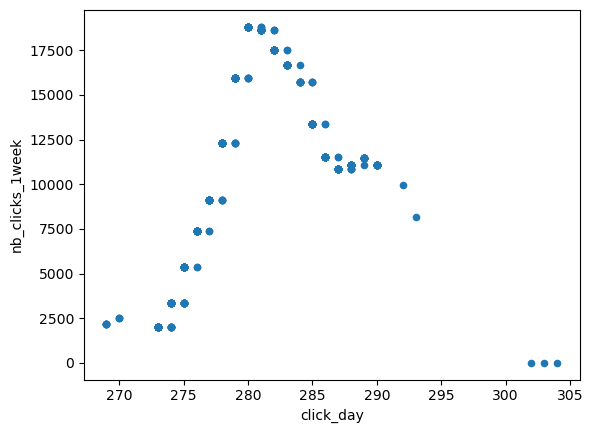

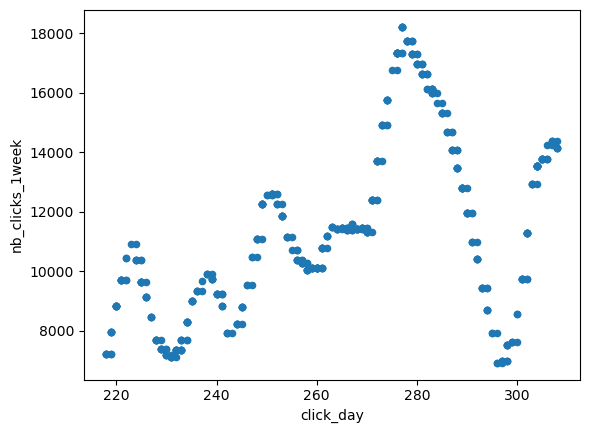

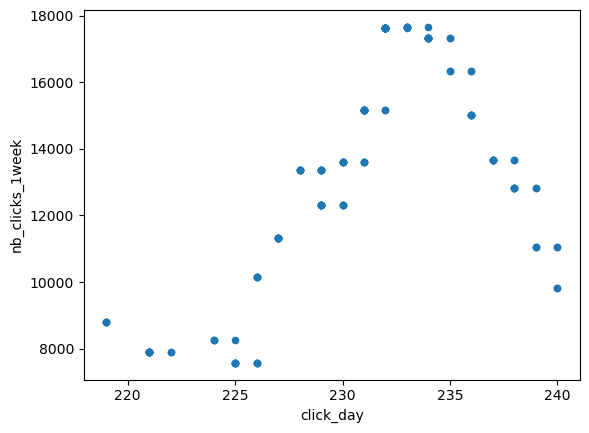

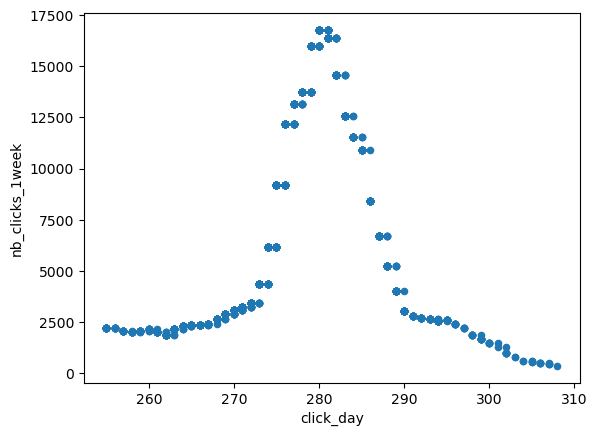

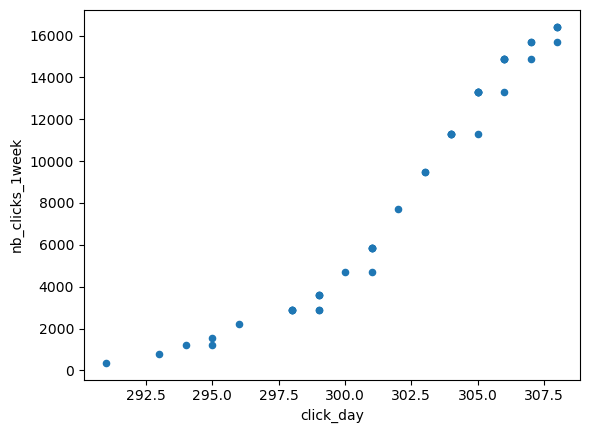

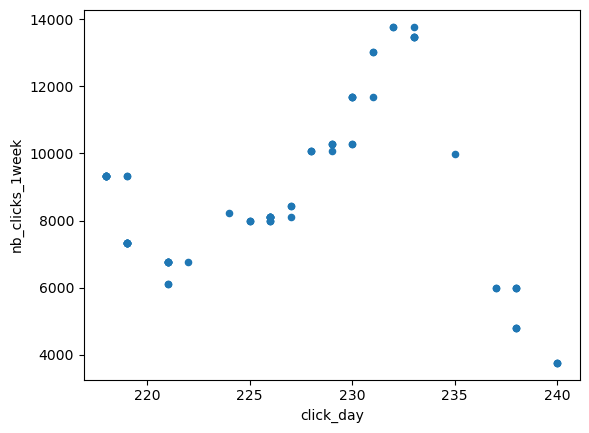

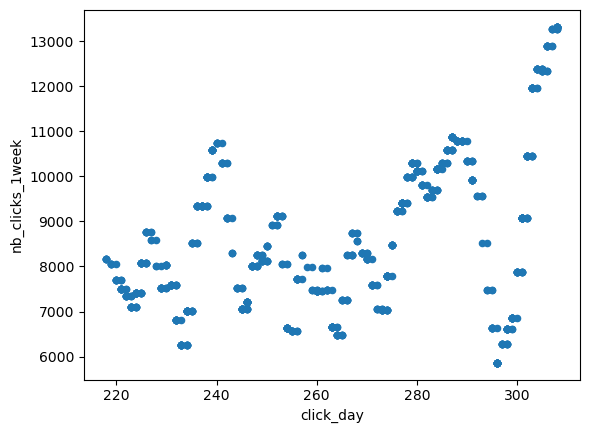

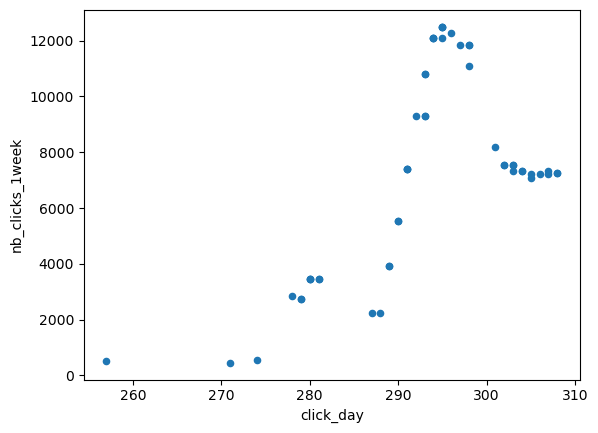

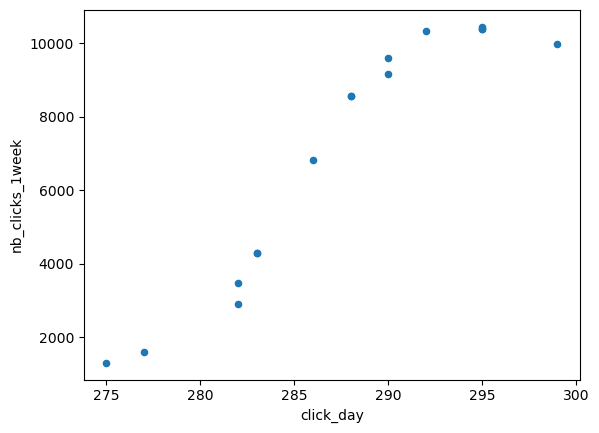

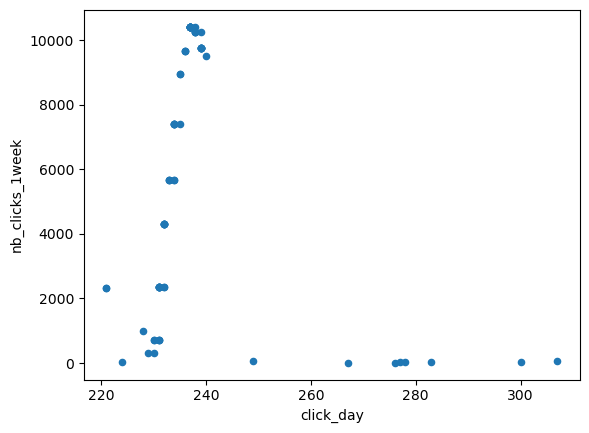

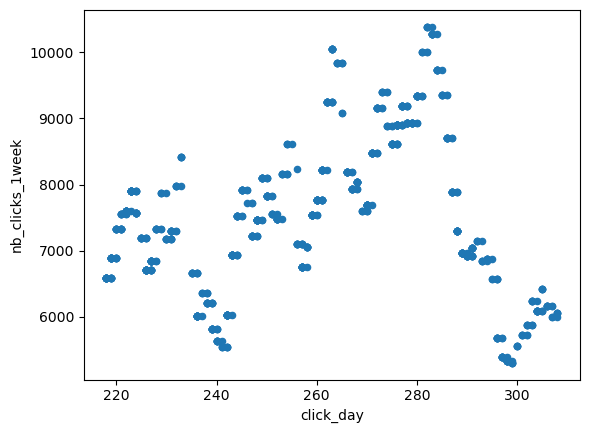

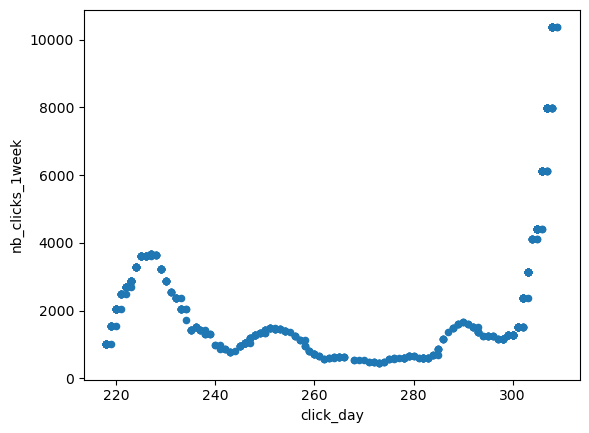

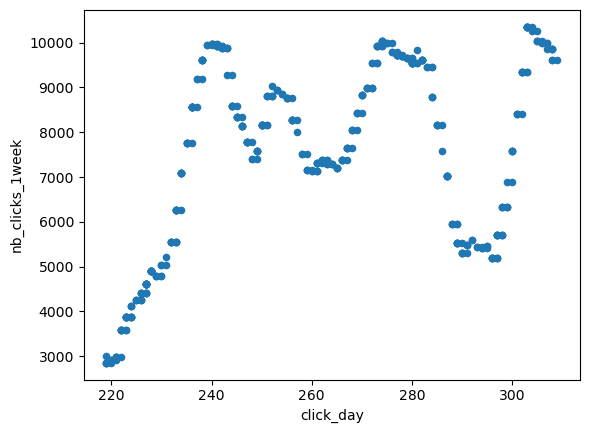

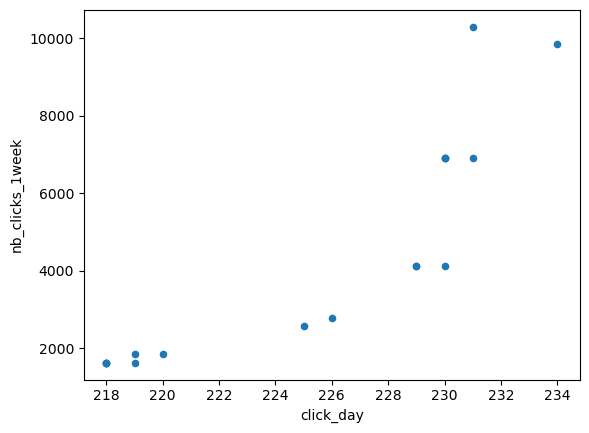

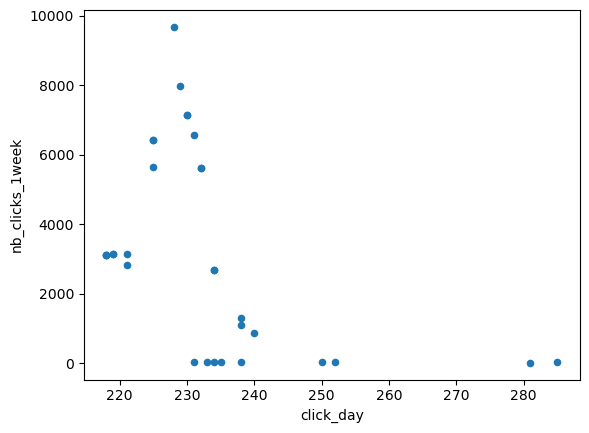

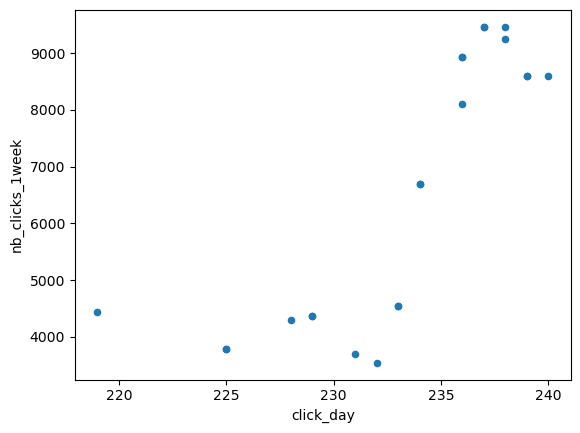

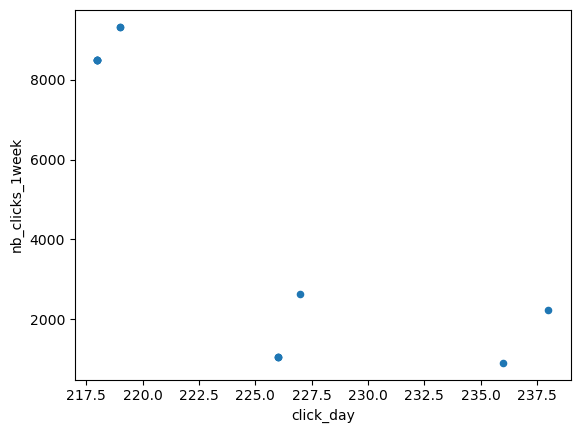

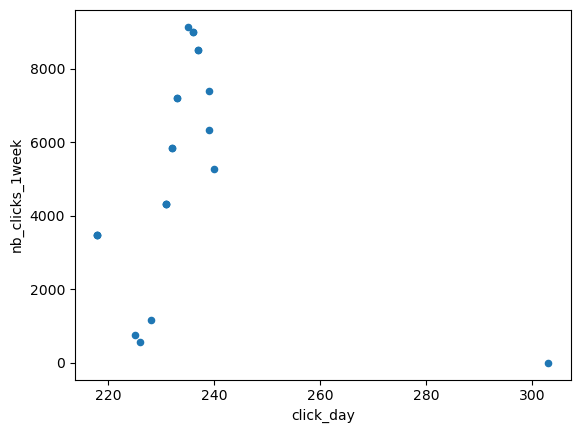

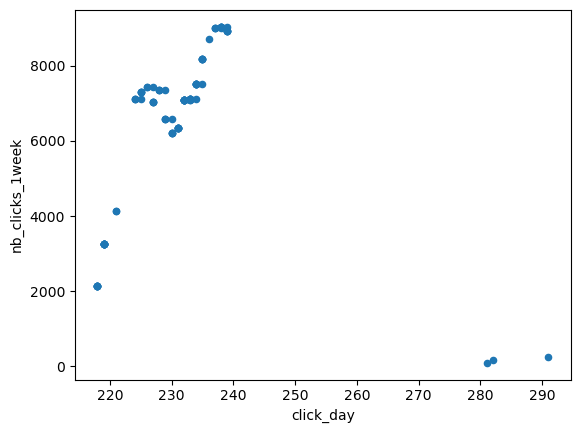

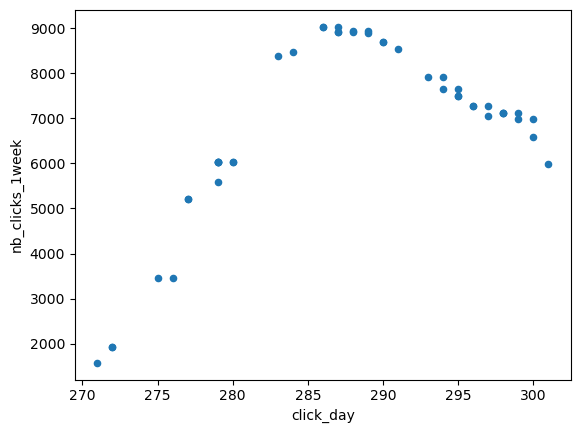

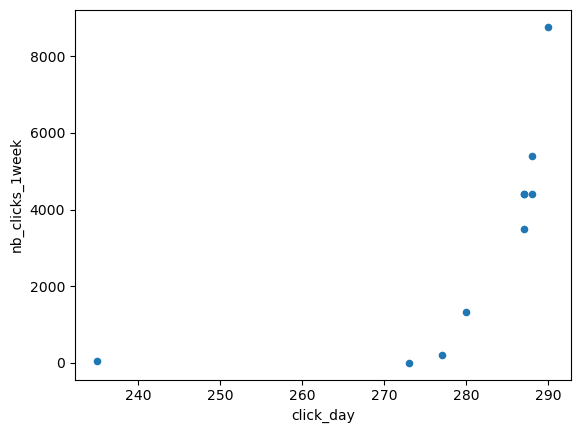

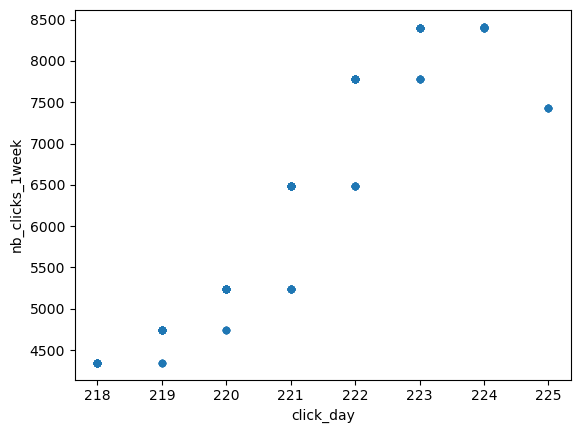

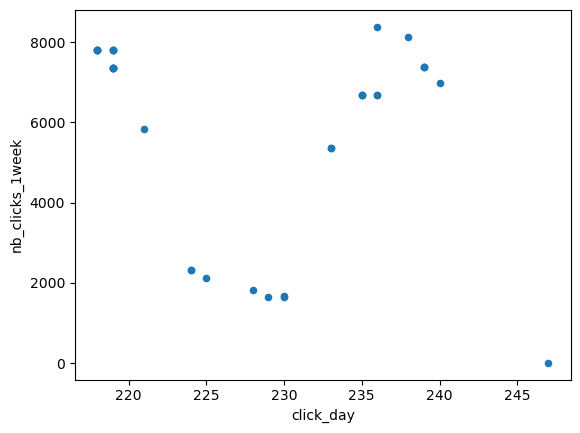

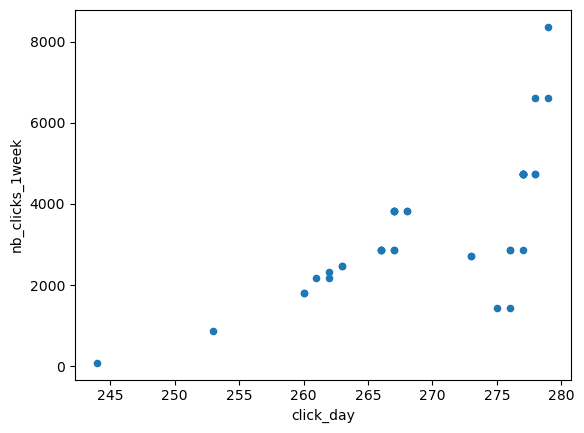

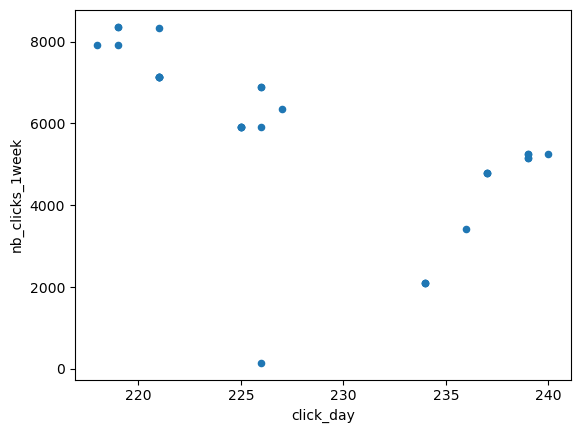

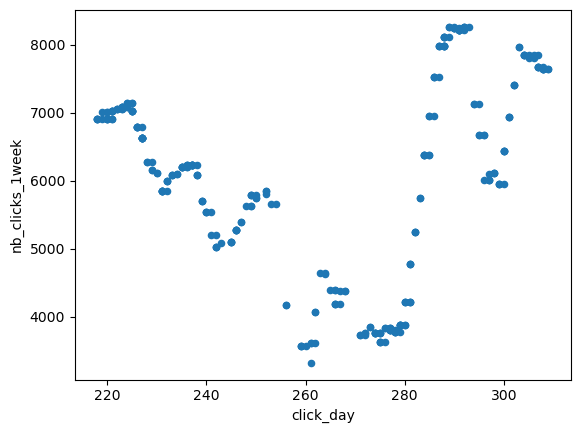

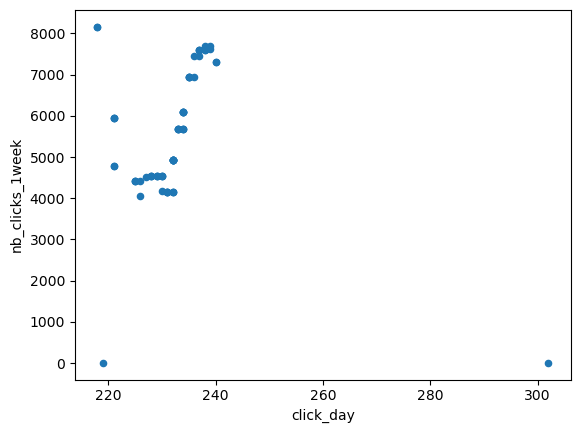

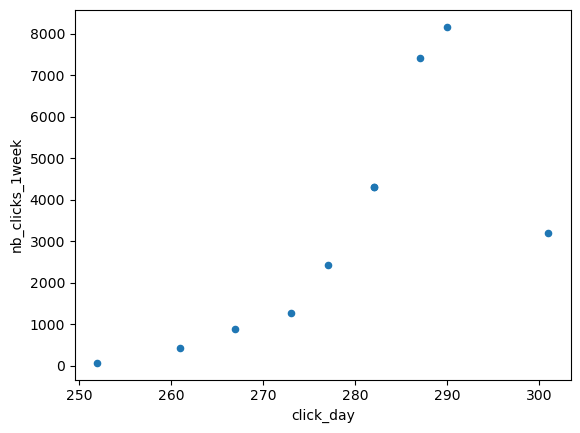

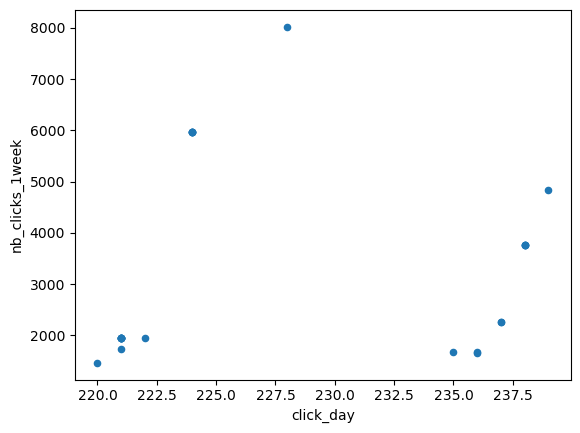

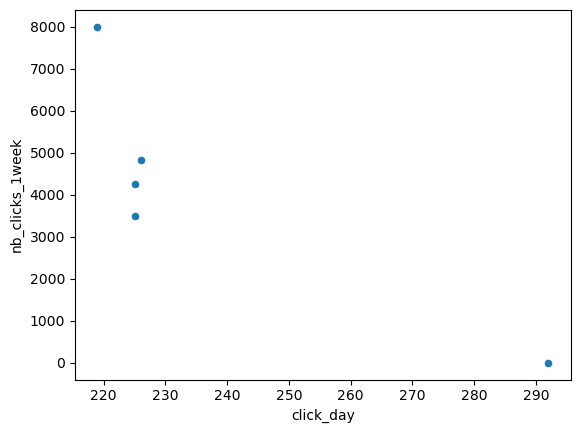

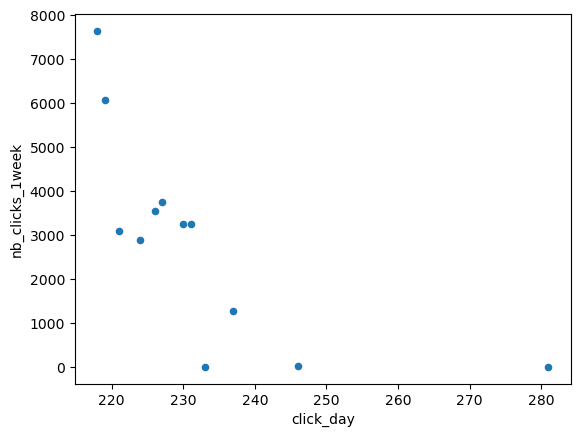

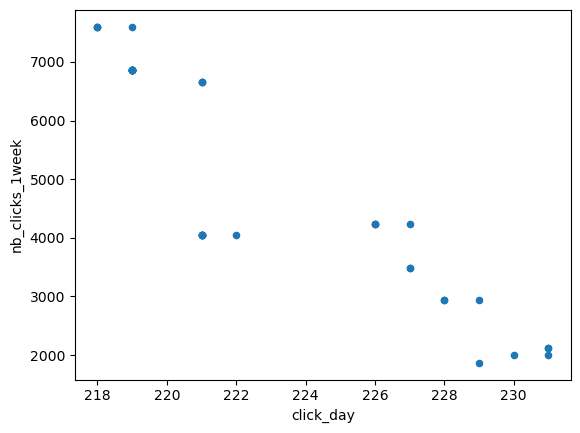

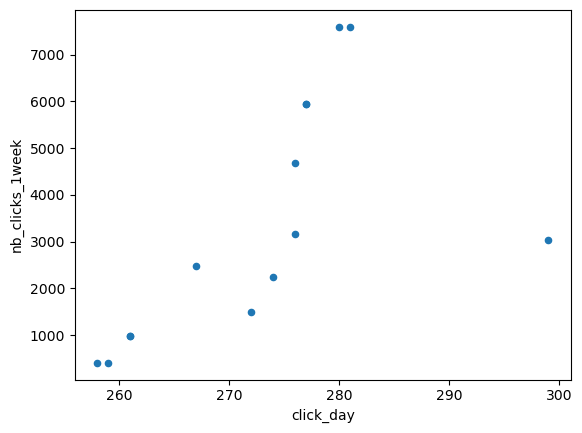

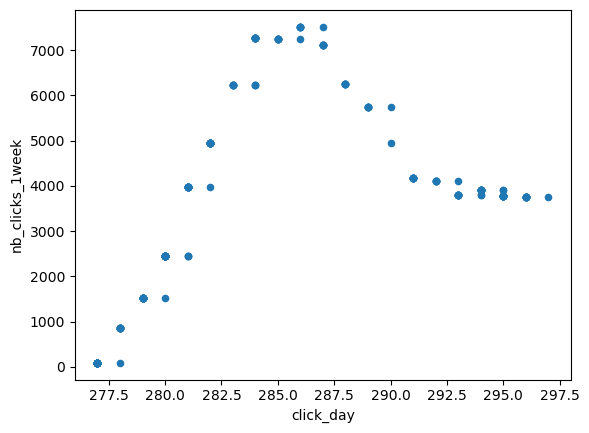

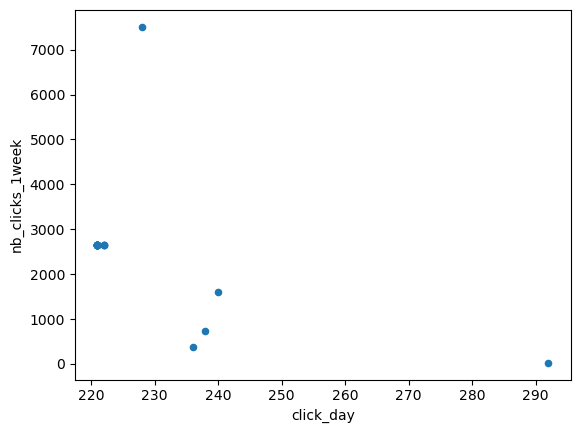

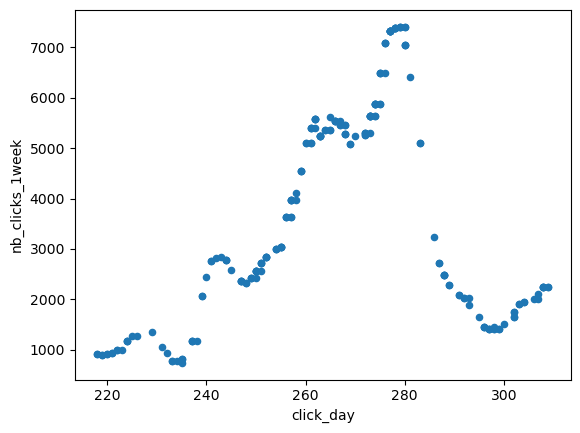

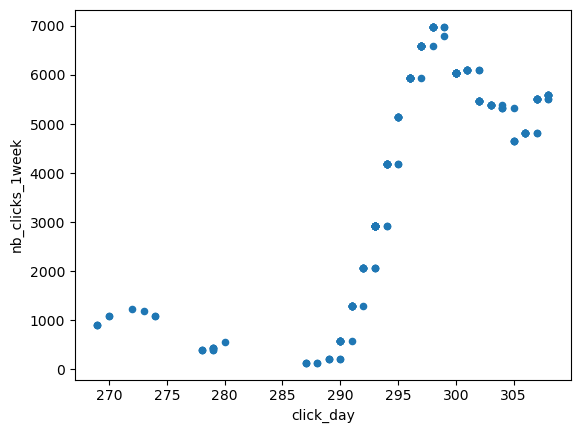

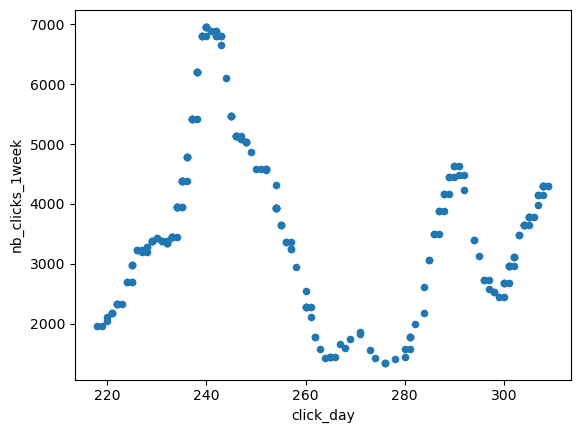

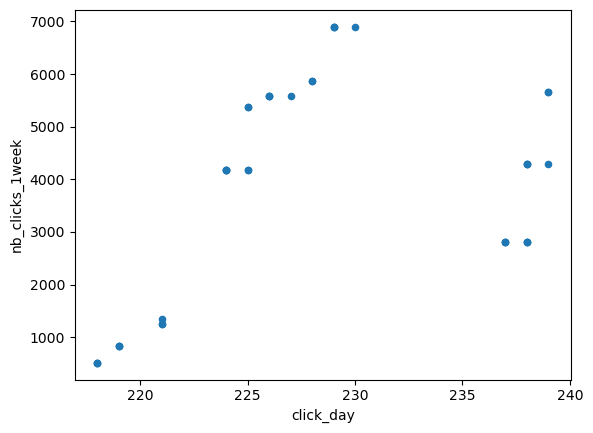

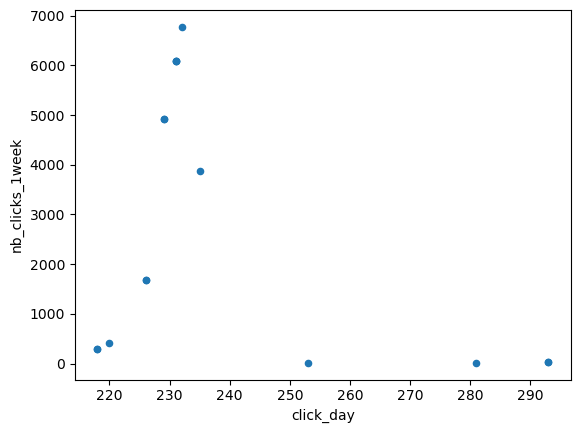

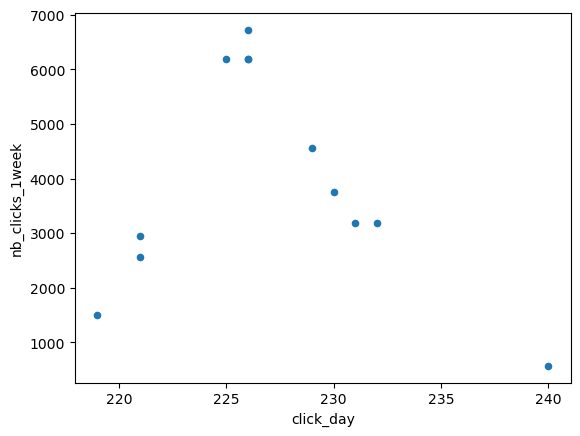

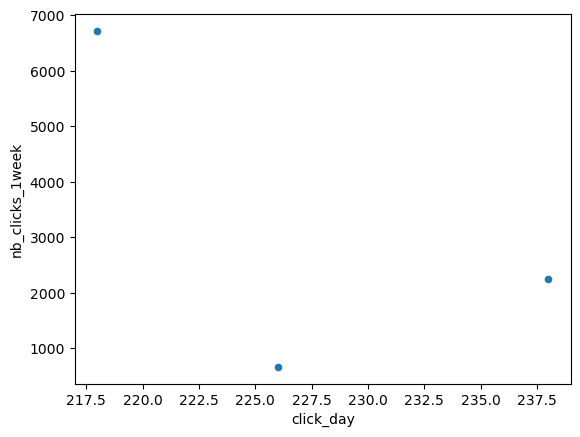

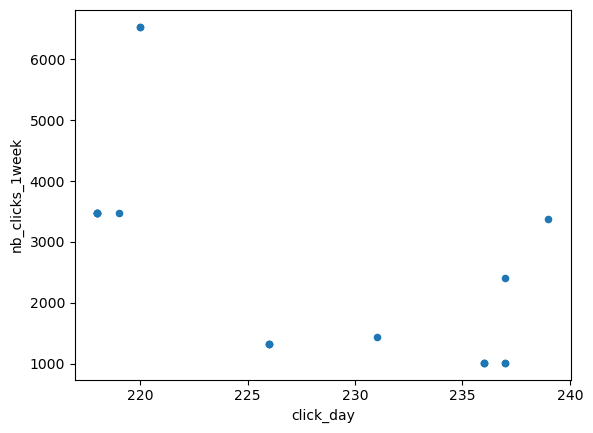

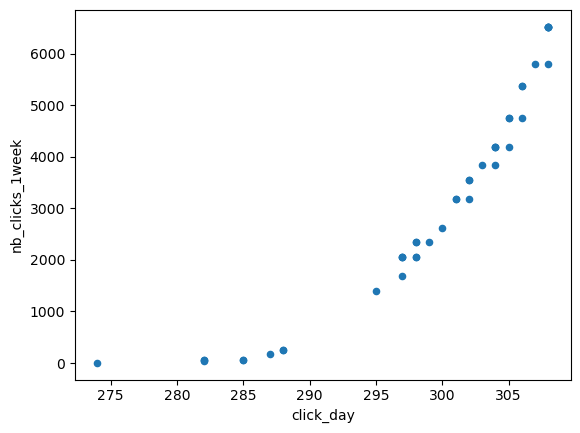

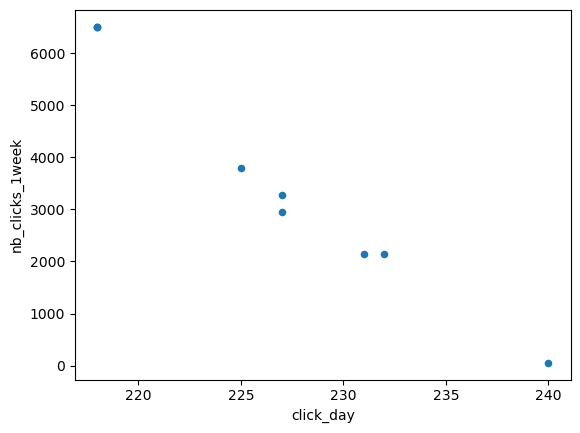

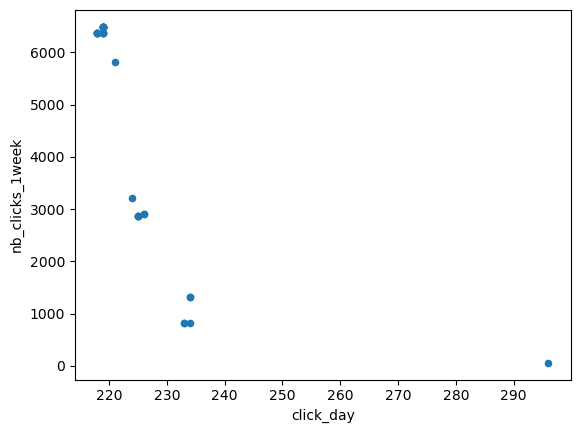

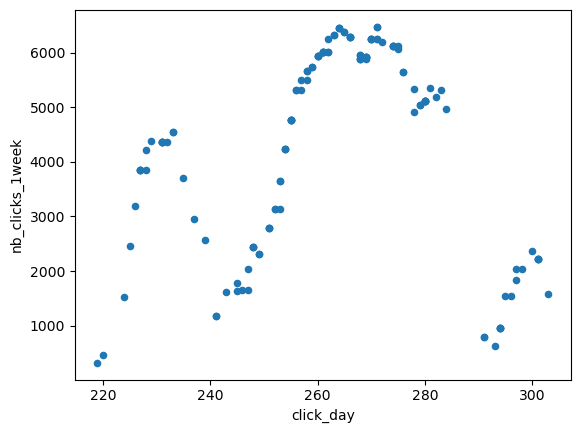

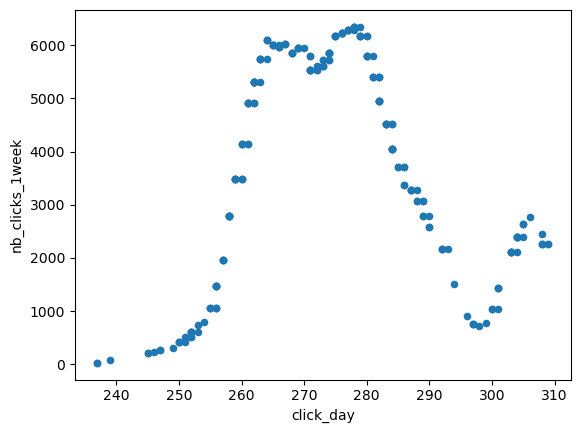

In [24]:
nb_scatter = 50
clicks_last_week_by_product_id = converted_products.groupby('product_id')['nb_clicks_1week'].max().sort_values(ascending=False)

for product_id in clicks_last_week_by_product_id.head(nb_scatter).index:
    print(converted_products.loc[(converted_products.product_id == product_id)].plot.scatter('click_day', 'nb_clicks_1week'))

